# Prophet Model


## モデル式
$$y=g(t)+s(t)+h(t)+ϵ_t$$

- $y(t)$：予測する変数
- $g(t)$ ：トレンドの項
- $s(t)$ ：周期性の項
- $h(t)$ ：祝日効果(イベント効果)の項
- $\epsilon_t$ ：正規分布に従う誤差項(ノイズ)

<details>
<summary> モデル詳細 </summary>

### $g(t)$ : トレンド関数

- ロジスティック非線形トレンド: $g(t) = \frac{C(t)}{1 + \exp(−(k + \boldsymbol{a}(t)^T \boldsymbol{\delta})(t − (m + \boldsymbol{a}(t)^T \gamma)))}$
    - ただし、$\boldsymbol{a}(t) = (a_1(t), \ldots, a_J(t))$
    - $a_j(t) =
        \begin{cases}
            1, \quad \mathrm{if} \quad t \geqq s_j ,\\
            0, \quad  \mathrm{otherwise.} \\
        \end{cases}$
    - $S = (s_1, \ldots, s_J)$

- 線形トレンド：$g(t) = (k + {\bf a}(t)^{\mathrm{T}}\boldsymbol{\delta})t + (m +  {\bf a}(t)^{\mathrm{T}}\boldsymbol{\gamma})$
    - ただし、$\gamma_j = −s_j\delta_j$

- 変化点の検出
    - $\delta_j ∼ {\rm Laplace}(0, \tau)$

### $s(t)$：季節変化

- $s(t) =  \sum_{n = 1}^N \left(a_n\cos \left(\frac{2\pi nt}{P} \right) + b_n\sin \left(\frac{2\pi nt}{P}\right)\right)$

### $h(t)$：休日効果

- $(t) = Z(t)\boldsymbol{\kappa}$
    - ただし、$\boldsymbol{\kappa} ∼ {\rm Normal}(0, \nu ^2)$

</details>

## Neural Prophet Model

### 参考
- [Documents](https://neuralprophet.com/contents.html)
- [sample1](https://www.salesanalytics.co.jp/datascience/datascience006/#NeuralProphet_FacebookProphet_Deep_Learning)


In [1]:
import pandas as pd  # 基本ライブラリー
from neuralprophet import NeuralProphet, set_log_level  # NeuralProphet
from sklearn.metrics import mean_absolute_error  # 評価指標MAE
from statistics import mean  # 平均値の計算
import matplotlib.pyplot as plt  # グラフ描写

# Disable logging messages unless there is an error
set_log_level("ERROR")

# グラフのスタイル
plt.style.use("ggplot")
# グラフサイズ設定
plt.rcParams["figure.figsize"] = [12, 9]

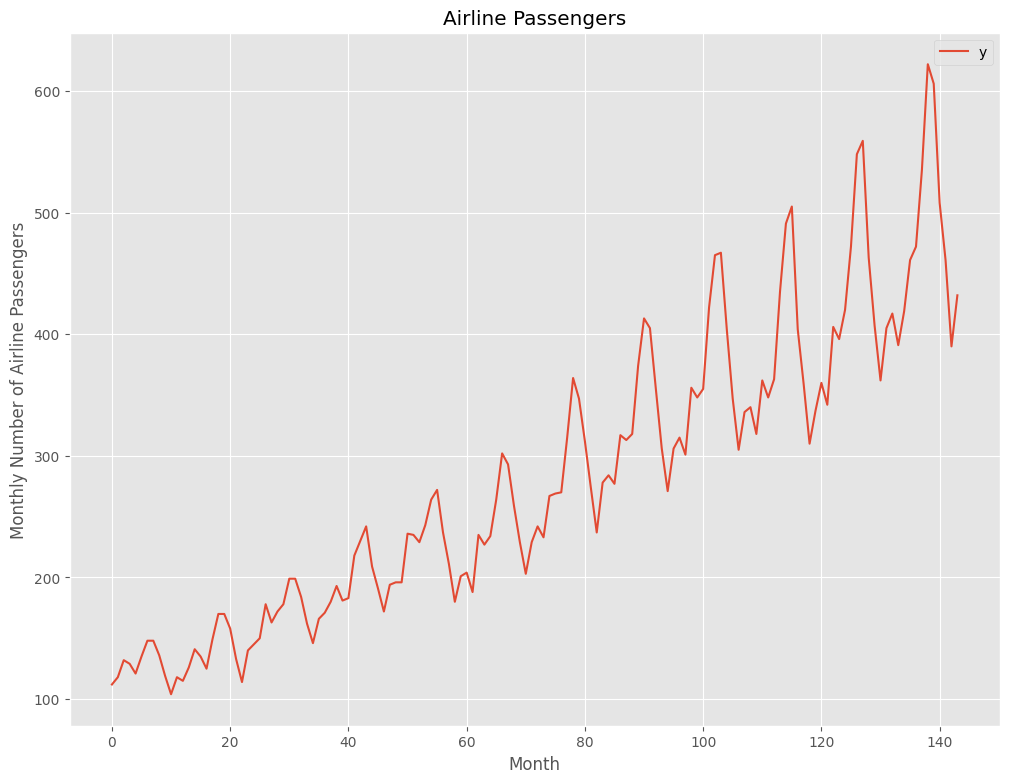

In [2]:
# データセットの読み込み
# Airline Passengers（飛行機乗客数）のデータセット読み込み
url = "https://www.salesanalytics.co.jp/591h"
df2 = pd.read_csv(url)
df2.columns = ["ds", "y"]

# 確認
df2.plot()
plt.title("Airline Passengers")  # グラフタイトル
plt.ylabel("Monthly Number of Airline Passengers")  # タテ軸のラベル
plt.xlabel("Month")  # ヨコ軸のラベル
plt.show()

In [3]:
# Airline Passengers（飛行機乗客数）
# 学習データとテストデータの分割
test_length = 12
df2_train = df2.iloc[:-test_length]
df2_test = df2.iloc[-test_length:]

In [4]:
# Airline Passengers（飛行機乗客数）
# NeuralProphet 予測モデル構築
df2_nprophet_model = NeuralProphet(seasonality_mode="multiplicative")
df2_nprophet_model_result = df2_nprophet_model.fit(df2_train, freq="M")

Missing logger folder: /home/akihiro/project/note/notebook/TimeSeries/lightning_logs


Finding best initial lr:   0%|          | 0/209 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [5]:
# Airline Passengers（飛行機乗客数）
# NeuralProphet 予測モデルの精度検証用データの生成
df2_future = df2_nprophet_model.make_future_dataframe(
    df2_train, periods=test_length, n_historic_predictions=len(df2_train)
)
df2_pred = df2_nprophet_model.predict(df2_future)

Predicting: 9it [00:00, ?it/s]

In [6]:
# Airline Passengers（飛行機乗客数）
# NeuralProphet 予測モデルの予測結果（学習データ期間＋テストデータ期間）
df2_nprophet_model.plot(df2_pred)  # 予想値（点は学習データの実測値）

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '00078b35-e4e9-49ed-b2df-432976ada525',
              'x': array([datetime.datetime(1949, 1, 1, 0, 0),
                          datetime.datetime(1949, 2, 1, 0, 0),
                          datetime.datetime(1949, 3, 1, 0, 0),
                          datetime.datetime(1949, 4, 1, 0, 0),
                          datetime.datetime(1949, 5, 1, 0, 0),
                          datetime.datetime(1949, 6, 1, 0, 0),
                          datetime.datetime(1949, 7, 1, 0, 0),
                          datetime.datetime(1949, 8, 1, 0, 0),
                          datetime.datetime(1949, 9, 1, 0, 0),
                          datetime.datetime(1949, 10, 1, 0, 0),
                          datetime.datetime(1949, 11, 1, 0, 0),
                       

In [7]:
df2_nprophet_model.plot_components(df2_pred)  # モデルの要素分解

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': '39f74ba6-a8e3-4105-a7ec-0dc485deee01',
              'x': array([datetime.datetime(1949, 1, 1, 0, 0),
                          datetime.datetime(1949, 2, 1, 0, 0),
                          datetime.datetime(1949, 3, 1, 0, 0),
                          datetime.datetime(1949, 4, 1, 0, 0),
                          datetime.datetime(1949, 5, 1, 0, 0),
                          datetime.datetime(1949, 6, 1, 0, 0),
                          datetime.datetime(1949, 7, 1, 0, 0),
                          datetime.datetime(1949, 8, 1, 0, 0),
                          datetime.datetime(1949, 9, 1, 0, 0),
                          datetime.datetime(1949, 10, 1, 0, 0),
                          datetime.datetime(1949, 11, 1, 0, 0),
                          datetime

In [8]:
# Airline Passengers（飛行機乗客数）
# テストデータに予測値を結合
df2_test = df2_test.assign(NeuralProphet_Predict=df2_pred.loc[-test_length:, "yhat1"])

MAE(NeuralProphet):
24.186609903971355
----------------------------
MAPE(NeuralProphet):
5.219727835029447


<Axes: title={'center': 'Forecast evaluation'}>

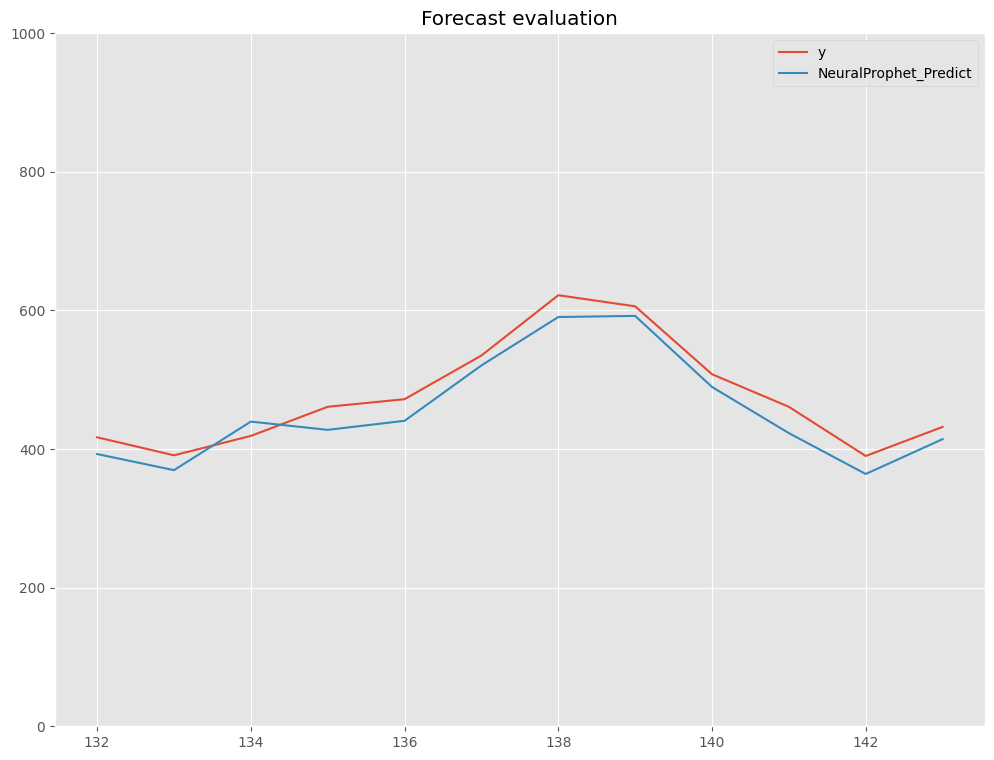

In [9]:
# Airline Passengers（飛行機乗客数）
# NeuralProphet 予測モデルの精度検証（テストデータ期間）
print("MAE(NeuralProphet):")
print(mean_absolute_error(df2_test["y"], df2_test["NeuralProphet_Predict"]))
print("----------------------------")
print("MAPE(NeuralProphet):")
print(
    mean(abs(df2_test["y"] - df2_test["NeuralProphet_Predict"]) / df2_test["y"]) * 100
)
df2_test.plot(title="Forecast evaluation", ylim=[0, 1000])

## Neural Prophetのカスタマイズ

- Conditional Seasonality (条件付き季節性)
- Global Local Modeling


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 189
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (35) is too small than the required number for the learning rate finder (226). The results might not be optimal.
Missing logger folder: /home/akihiro/project/note/notebook/TimeSeries/lightning_logs


Finding best initial lr:   0%|          | 0/226 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 35it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


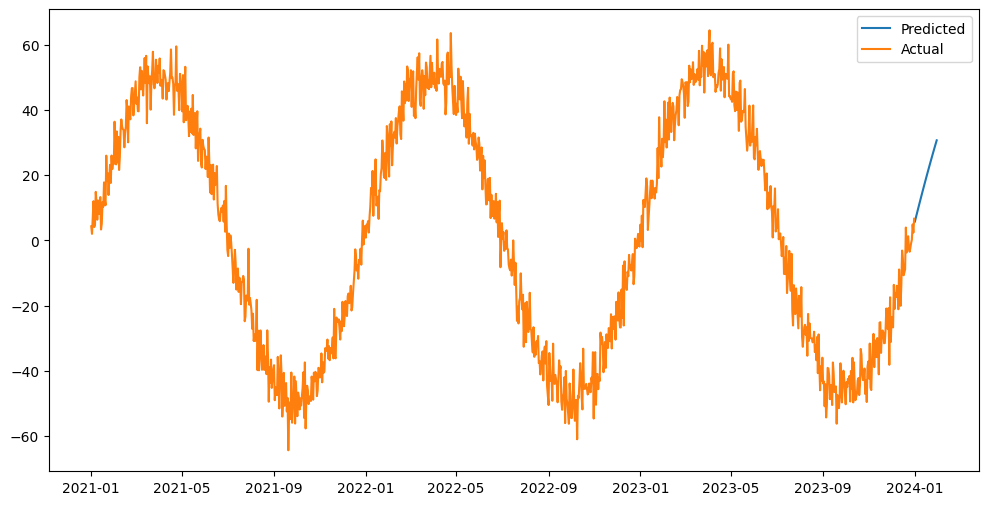

In [1]:
import numpy as np
import pandas as pd
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt

# サンプルデータの生成
np.random.seed(42)
days = 365 * 3
date = pd.date_range(start="2021-01-01", periods=days, freq="D")
y = (
    np.sin(date.dayofyear / 365 * 2 * np.pi) * 50
    + date.year
    - 2020
    + np.random.randn(days) * 5
)  # 年次の季節性 + トレンド + ノイズ
df = pd.DataFrame({"ds": date, "y": y})

# NeuralProphetモデルの初期化（ARコンポーネントなし）
model = NeuralProphet(
    yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False
)

# モデルの訓練
model.fit(df, freq="D")

# 未来30日のデータフレームを作成（yはNaNとする）
future = model.make_future_dataframe(df, periods=30)
future["y"] = np.nan  # yの値をNaNに

# 未来30日の予測
forecast = model.predict(future)

# 結果の可視化
plt.figure(figsize=(12, 6))
plt.plot(forecast["ds"], forecast["yhat1"], label="Predicted")
plt.plot(df["ds"], df["y"], label="Actual")
plt.legend()
plt.show()